[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


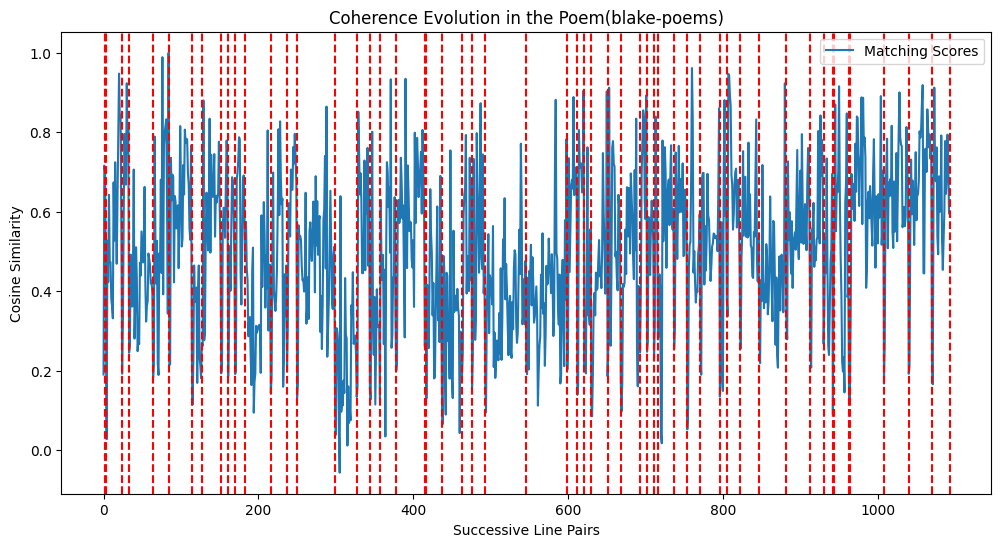

In [1]:

!pip install fasttext
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg

import fasttext.util
#fasttext.util.download_model('en', if_exists='ignore')  # English
model = fasttext.load_model('cc.en.300.bin')

from gensim.models.fasttext import FastText
import numpy as np
import fasttext
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

blake_poems = gutenberg.raw("blake-poems.txt").encode('utf-8').decode('utf-8')
# Preprocess the text and split it into lines
poem_lines = blake_poems.split('\n')
poem_lines = [line.strip() for line in poem_lines if line.strip()]

#print(poem_lines)# Calculate line embeddings and matching scores
line_embeddings = []
matching_scores = []
chapter_boundaries = []

current_chapter = None
for i, line in enumerate(poem_lines):
    if line.isupper():
        # This line indicates a new chapter
        if current_chapter is not None:
            chapter_boundaries.append(i - 1)
        current_chapter = line
    words = line.split()  # Split the line into words
    line_vector = np.mean([model[word] for word in words], axis=0)  # Access word vectors directly
    line_embeddings.append(line_vector)
    if i > 0:
        similarity = cosine_similarity([line_embeddings[i - 1]], [line_embeddings[i]])[0][0]
        matching_scores.append(similarity)

# Append the last line as a boundary to the last chapter
chapter_boundaries.append(len(poem_lines) - 1)

# Create a plot to visualize matching scores and chapter boundaries
plt.figure(figsize=(12, 6))
plt.plot(matching_scores, label="Matching Scores")
plt.xlabel("Successive Line Pairs")
plt.ylabel("Cosine Similarity")
plt.title("Coherence Evolution in the Poem(blake-poems)")

# Add vertical lines for chapter boundaries
for boundary in chapter_boundaries:
    plt.axvline(x=boundary, color='r', linestyle='--')

plt.legend()
plt.show()

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


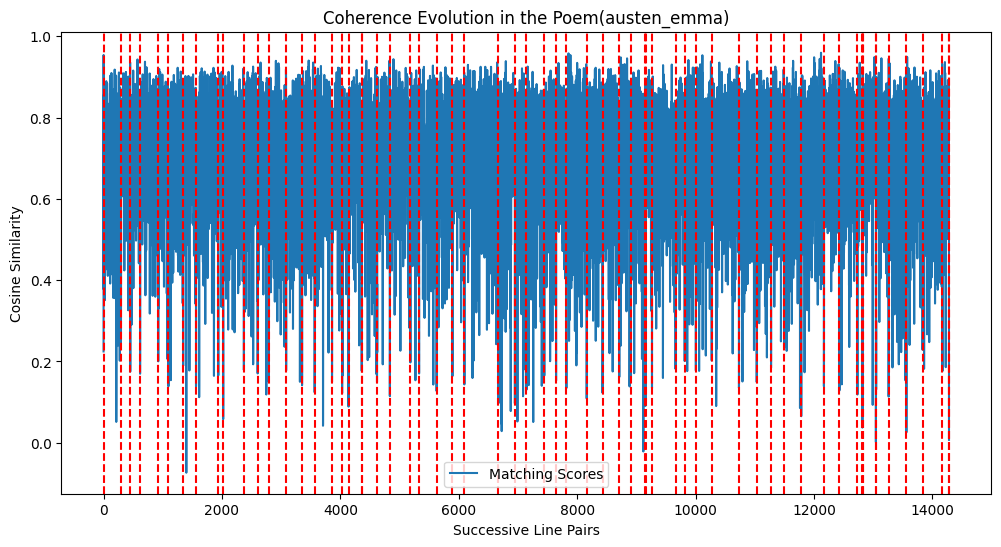

In [1]:

!pip install fasttext
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg

import fasttext.util
#fasttext.util.download_model('en', if_exists='ignore')  # English
model = fasttext.load_model('cc.en.300.bin')

from gensim.models.fasttext import FastText
import numpy as np
import fasttext
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

austen_emma = gutenberg.raw("austen-emma.txt").encode('utf-8').decode('utf-8')
# Preprocess the text and split it into lines
poem_lines = austen_emma.split('\n')
poem_lines = [line.strip() for line in poem_lines if line.strip()]

#print(poem_lines)# Calculate line embeddings and matching scores
line_embeddings = []
matching_scores = []
chapter_boundaries = []

current_chapter = None
for i, line in enumerate(poem_lines):
    if line.isupper():
        # This line indicates a new chapter
        if current_chapter is not None:
            chapter_boundaries.append(i - 1)
        current_chapter = line
    words = line.split()  # Split the line into words
    line_vector = np.mean([model[word] for word in words], axis=0)  # Access word vectors directly
    line_embeddings.append(line_vector)
    if i > 0:
        similarity = cosine_similarity([line_embeddings[i - 1]], [line_embeddings[i]])[0][0]
        matching_scores.append(similarity)

# Append the last line as a boundary to the last chapter
chapter_boundaries.append(len(poem_lines) - 1)

# Create a plot to visualize matching scores and chapter boundaries
plt.figure(figsize=(12, 6))
plt.plot(matching_scores, label="Matching Scores")
plt.xlabel("Successive Line Pairs")
plt.ylabel("Cosine Similarity")
plt.title("Coherence Evolution in the Poem(austen_emma)")

# Add vertical lines for chapter boundaries
for boundary in chapter_boundaries:
    plt.axvline(x=boundary, color='r', linestyle='--')

plt.legend()
plt.show()